In [23]:
import pandas as pd 
import json
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### Taking input data as a Pandas Dataframe

In [24]:
mergedData = pd.read_csv('merged_data.csv')

In [25]:
mergedData['review_count'].head()

0    65
1    65
2    65
3    65
4    65
Name: review_count, dtype: int64

### Filtering based on the two decided cities -> Philadelphia and Indianapolis

In [26]:
breweriesPhiladelphia = pd.read_csv('philly_beer_data.csv')
breweriesIndianapolis = pd.read_csv('indi_beer_data.csv')

### Getting Sentiment score on the basis of review text/

In [27]:
sentimentList = list()
# Getting sentiment score for each row
for index,row in breweriesIndianapolis.iterrows():
    #print(row['text'])
    sentimentList.append(TextBlob(breweriesIndianapolis.loc[index,'text']).sentiment.polarity)

breweriesIndianapolis = breweriesIndianapolis.assign(sentiment_score = sentimentList)

In [28]:
print(breweriesIndianapolis.head())

   Unnamed: 0             business_id                       name  \
0           0  7clCBgNbd-x2Wj96lZ6Mjw  Bier Brewery and Tap Room   
1           1  7clCBgNbd-x2Wj96lZ6Mjw  Bier Brewery and Tap Room   
2           2  7clCBgNbd-x2Wj96lZ6Mjw  Bier Brewery and Tap Room   
3           3  7clCBgNbd-x2Wj96lZ6Mjw  Bier Brewery and Tap Room   
4           4  7clCBgNbd-x2Wj96lZ6Mjw  Bier Brewery and Tap Room   

          address          city state  postal_code   latitude  longitude  \
0  5133 E 65th St  Indianapolis    IN        46220  39.875532 -86.082857   
1  5133 E 65th St  Indianapolis    IN        46220  39.875532 -86.082857   
2  5133 E 65th St  Indianapolis    IN        46220  39.875532 -86.082857   
3  5133 E 65th St  Indianapolis    IN        46220  39.875532 -86.082857   
4  5133 E 65th St  Indianapolis    IN        46220  39.875532 -86.082857   

   avg_star  ...  Music  BYOB Smoking WheelchairAccessible  \
0       4.5  ...    NaN   NaN     NaN                  NaN   
1       4.

In [29]:
sentimentList = list()
# Getting sentiment score for each row
for index,row in breweriesPhiladelphia.iterrows():
    #print(row['text'])
    sentimentList.append(TextBlob(breweriesPhiladelphia.loc[index,'text']).sentiment.polarity)

breweriesPhiladelphia = breweriesPhiladelphia.assign(sentiment_score = sentimentList)

In [30]:
breweriesPhiladelphia.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'avg_star', 'review_count',
       'is_open', 'categories', 'hours', 'review_count_standard', 'review_id',
       'user_id', 'review_star', 'useful', 'funny', 'cool', 'text', 'date',
       'num_words_review', 'OutdoorSeating', 'RestaurantsPriceRange2',
       'BusinessAcceptsCreditCards', 'DogsAllowed', 'Ambience', 'HappyHour',
       'GoodForMeal', 'RestaurantsDelivery', 'HasTV', 'BusinessParking',
       'RestaurantsTakeOut', 'GoodForKids', 'BikeParking', 'ByAppointmentOnly',
       'RestaurantsReservations', 'Alcohol', 'WiFi', 'GoodForDancing',
       'CoatCheck', 'NoiseLevel', 'BestNights', 'Caters',
       'RestaurantsGoodForGroups', 'RestaurantsAttire', 'Music', 'BYOB',
       'Smoking', 'WheelchairAccessible', 'RestaurantsTableService',
       'BusinessAcceptsBitcoin', 'Corkage', 'BYOBCorkage', 'DriveThru',
       'sentiment_score'],
      dtype='object')

### Engineering attribute columns to find correlation

In [128]:
# replacing NaN with 0 to represent missing information
breweriesIndianapolis = breweriesIndianapolis.fillna(0.0)

# replacing True with 1 and False with -1
breweriesIndianapolis = breweriesIndianapolis.replace({'True': 1.0, 'False': -1.0, True :1.0, False: -1.0, None:0.0, 'None':0.0})
breweriesIndianapolis['Alcohol'] = breweriesIndianapolis['Alcohol'].replace({"u'beer_and_wine'": 1, "u'full_bar'": 2, "'full_bar'": 2,
       "'beer_and_wine'":1, "u'none'": -1})
breweriesIndianapolis['WiFi'] = breweriesIndianapolis['WiFi'].replace({"u'free'": 1, "'free'" :1, "u'no'": -1, "'no'" :-1})
breweriesIndianapolis['NoiseLevel'] = breweriesIndianapolis['NoiseLevel'].replace({"'quiet'": 0, "u'average'": 1, "'average'": 1, "u'loud'": 2, "u'quiet'": 0,
       "u'very_loud'": 2})
breweriesIndianapolis['Smoking'] = breweriesIndianapolis['Smoking'].replace({"u'no'": 0, "u'outdoor'": 1})
print(breweriesIndianapolis['OutdoorSeating'].head())

# getting a final rating for each review -> (sentiment_score * standardized review count) 
breweriesIndianapolis = breweriesIndianapolis.assign(final_rating = breweriesIndianapolis['sentiment_score'] * breweriesIndianapolis['review_count_standard'])

# checking head of df 
breweriesIndianapolis.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: OutdoorSeating, dtype: float64


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,...,BYOB,Smoking,WheelchairAccessible,RestaurantsTableService,BusinessAcceptsBitcoin,Corkage,BYOBCorkage,DriveThru,sentiment_score,final_rating
0,0,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,-1,0.269421,0.057949
1,1,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,-1,0.299048,0.064322
2,2,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,-1,0.239091,0.051426
3,3,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,-1,0.490972,0.105602
4,4,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,-1,0.430000,0.092488


In [153]:
# plotting histogram with all attributes to understand what reviews are correlated with
attrList = ['OutdoorSeating', 'RestaurantsPriceRange2',
       'BusinessAcceptsCreditCards', 'DogsAllowed', 'HappyHour',
        'RestaurantsDelivery', 'HasTV', 'Alcohol',
       'RestaurantsTakeOut', 'GoodForKids', 'BikeParking', 'ByAppointmentOnly',
       'RestaurantsReservations', 'WiFi', 'GoodForDancing',
       'CoatCheck', 'NoiseLevel',  'Caters',
       'RestaurantsGoodForGroups',   'BYOB',
       'Smoking', 'WheelchairAccessible', 'RestaurantsTableService',
       'BusinessAcceptsBitcoin', 'Corkage', 'final_rating']

# Applying group by to remove redundancy in terms of business attributes
breweriesIndianapolis['business_rating'] = breweriesIndianapolis['final_rating'].groupby(breweriesIndianapolis['business_id']).transform('mean')
breweriesIndianapolis.head()


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,...,Smoking,WheelchairAccessible,RestaurantsTableService,BusinessAcceptsBitcoin,Corkage,BYOBCorkage,DriveThru,sentiment_score,final_rating,business_rating
0,0,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.269421,0.057949,0.064815
1,1,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.299048,0.064322,0.064815
2,2,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.239091,0.051426,0.064815
3,3,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.490972,0.105602,0.064815
4,4,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.430000,0.092488,0.064815


In [142]:
breweriesIndianapolis.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,...,Smoking,WheelchairAccessible,RestaurantsTableService,BusinessAcceptsBitcoin,Corkage,BYOBCorkage,DriveThru,sentiment_score,final_rating,business_rating
0,0,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.269421,0.057949,NaN
1,1,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.299048,0.064322,NaN
2,2,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.239091,0.051426,NaN
3,3,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.490972,0.105602,NaN
4,4,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,...,-1,-1,-1,-1,-1,-1,-1,0.430000,0.092488,NaN


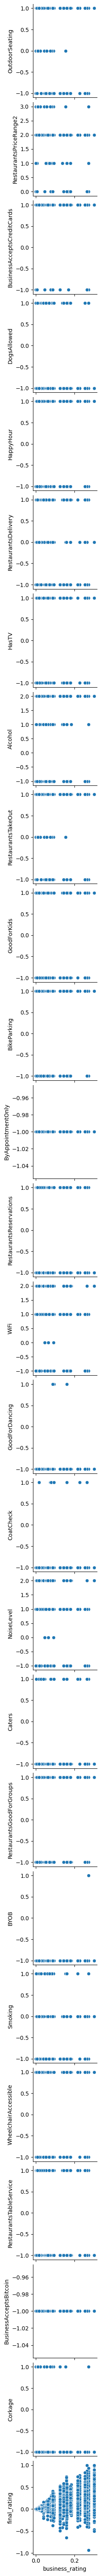

In [156]:
sns.pairplot(breweriesIndianapolis , y_vars = attrList, x_vars = 'business_rating', kind="scatter")